# Computational Drug Discovery [Part 2] Exploratory Data Analysis.

This is the real life Data science project for my **Biological Data Science** Portifolio. Particularly, we will be  building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Description Calculation and Exploratory Data Analysis.

## Install conda and rdkit

using !pip to install rdkit because through conda we are getting import error

In [83]:
!pip install rdkit-pypi

## Load bioactivity data

In [84]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,intermediate
...,...,...,...,...
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,active
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,NaN
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,162.18,NaN
245,NaN,NaN,NaN,inactive


In [86]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [87]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')


In [88]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL187579,7200.00,intermediate,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21
1,CHEMBL188487,9400.00,intermediate,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21
2,CHEMBL185698,13500.00,inactive,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21
3,CHEMBL426082,13110.00,inactive,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21
4,CHEMBL187717,2000.00,intermediate,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]
...,...,...,...,...
242,CHEMBL2365410,161.00,active,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...
243,CHEMBL5436771,165.96,NaN,S=C([S-])NCc1cccnc1
244,CHEMBL2365410,162.18,NaN,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...
245,NaN,NaN,inactive,nan


## Calculate Lipinski descriptiors
Christopher Lipinski, a scientist at Pfzier, came up with a set of rule_of_thumb for evaluating the **druglikeness** of compound. such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile.
lipinski analyzed all orally FDA-approved drugs in the formulation of what is to be known as the **Rule-of-five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:


*   Molecular weight < 500 dalton
*   Octanol-water partition coefficient(LogP) < 5
*   Hydrogen bond donors < 5
*   hydrogen bond acceptors < 10





### Import libraries

In [89]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


### Calculate descriptors

In [90]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
      # Check if the element is a string before processing
        if isinstance(elem, str):
          mol=Chem.MolFromSmiles(elem)
          # Check if the molecule was successfully created
          moldata.append(mol)
          if mol is not None:
            moldata.append(mol)
          else:
            if verbose:
              print(f"Warning: Could not process SMILES string: {elem}")
        else:
          if verbose:
            print(f"Warning: Skipping invalid SMILES string: {elem}")

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [91]:
df_lipinski = lipinski(df.canonical_smiles)

### Combine DataFrames

let's take a look at the 2 DataFrames that will be combined.

In [92]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,281.271,1.89262,0.0,5.0
2,415.589,3.81320,0.0,2.0
3,415.589,3.81320,0.0,2.0
4,421.190,2.66050,0.0,4.0
...,...,...,...,...
485,485.559,0.54470,5.0,7.0
486,222.379,-1.99300,1.0,3.0
487,222.379,-1.99300,1.0,3.0
488,485.559,0.54470,5.0,7.0


In [93]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,intermediate
...,...,...,...,...
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,active
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,NaN
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,162.18,NaN
245,NaN,NaN,NaN,inactive


Now, Let's combine the 2dataFrame

In [94]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [95]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,281.271,1.89262,0.0,5.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,415.589,3.81320,0.0,2.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,415.589,3.81320,0.0,2.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,421.190,2.66050,0.0,4.0
...,...,...,...,...,...,...,...,...
485,NaN,NaN,NaN,NaN,485.559,0.54470,5.0,7.0
486,NaN,NaN,NaN,NaN,222.379,-1.99300,1.0,3.0
487,NaN,NaN,NaN,NaN,222.379,-1.99300,1.0,3.0
488,NaN,NaN,NaN,NaN,485.559,0.54470,5.0,7.0


### Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50 will accept a dataFrame as input and will:


*   Take the IC50 value from the ``standard_value`` coloumn and converts it from nMto M by multipying the value by 10$^{-9}$
*   Take the molar value and apply -log10
*   Delete the ``standard_value`` coloumn and create a new ``pIC50`` column



In [96]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [97]:
df_combined.standard_value.describe()

,standard_value
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


In [98]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [99]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

We will first apply the norm_value() function so that the value in the standard_value coloumn is normalized.

In [100]:
#from re import X
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x


In [101]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,281.271,1.89262,0.0,5.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,415.589,3.81320,0.0,2.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,421.190,2.66050,0.0,4.0,2000.0
...,...,...,...,...,...,...,...,...
485,NaN,NaN,NaN,485.559,0.54470,5.0,7.0,NaN
486,NaN,NaN,NaN,222.379,-1.99300,1.0,3.0,NaN
487,NaN,NaN,NaN,222.379,-1.99300,1.0,3.0,NaN
488,NaN,NaN,NaN,485.559,0.54470,5.0,7.0,NaN


In [102]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


In [103]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,281.271,1.89262,0.0,5.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,415.589,3.81320,0.0,2.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,421.190,2.66050,0.0,4.0,5.698970
...,...,...,...,...,...,...,...,...
485,NaN,NaN,NaN,485.559,0.54470,5.0,7.0,NaN
486,NaN,NaN,NaN,222.379,-1.99300,1.0,3.0,NaN
487,NaN,NaN,NaN,222.379,-1.99300,1.0,3.0,NaN
488,NaN,NaN,NaN,485.559,0.54470,5.0,7.0,NaN


In [104]:
df_final.pIC50.describe()

,pIC50
count,245.000000
mean,4.894585
std,0.911338
min,2.698970
25%,4.327902
50%,4.823909
75%,5.301030
max,7.301030


### Removing the 'intermediate' bioactivity class
here, we will be removing the intermediate class from our Data Set.

In [105]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,415.589,3.8132,0.0,2.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,415.589,3.8132,0.0,2.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,421.190,2.6605,0.0,4.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,293.347,3.6308,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,338.344,3.5390,0.0,5.0,4.950782
...,...,...,...,...,...,...,...,...
485,NaN,NaN,NaN,485.559,0.5447,5.0,7.0,NaN
486,NaN,NaN,NaN,222.379,-1.9930,1.0,3.0,NaN
487,NaN,NaN,NaN,222.379,-1.9930,1.0,3.0,NaN
488,NaN,NaN,NaN,485.559,0.5447,5.0,7.0,NaN


In [106]:
df_2class.to_csv('bioactivity_data_2class_pIC50.csv', index=False)

# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Import library

In [107]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


### Frequency plot of the 2 bioactivity classes

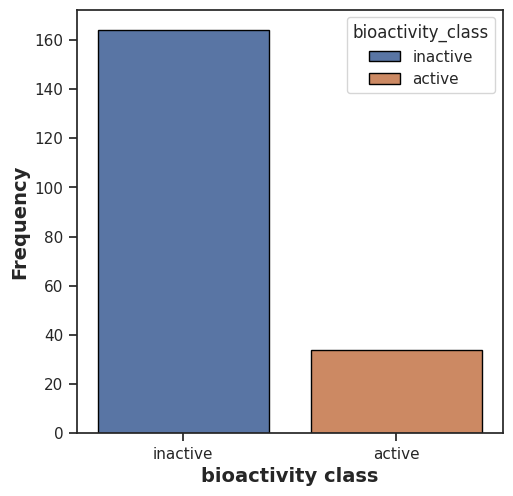

In [108]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, hue='bioactivity_class', edgecolor='black')

plt.xlabel('bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')




### Scatter  plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by  the scatter plot of MW vs LogP.

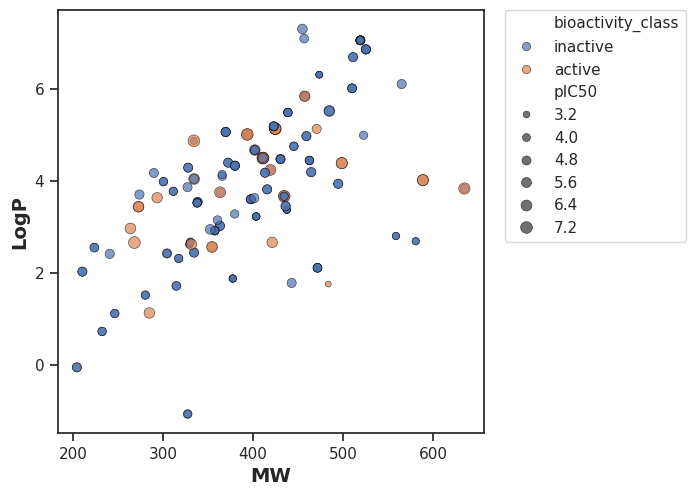

In [109]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## Box plot

### pIC50 value

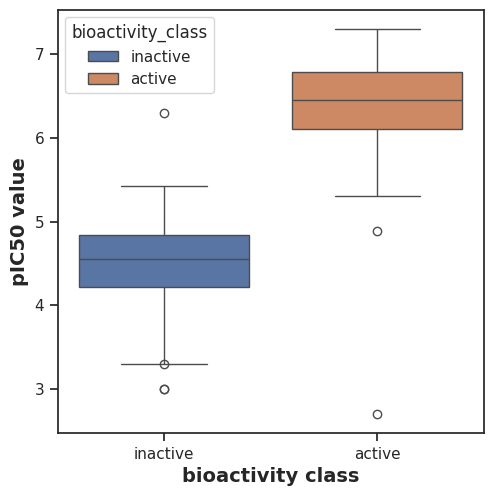

In [110]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_pic50.pdf')

#### statistical analysis | Mann-Whitney U Test

In [111]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

 #seed the random number generator
  seed(1)

 #actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

  # compare samples
  stat, p = mannwhitneyu(active, inactive)
  print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [112]:
mannwhitney('pIC50')

Statistics=nan, p=nan


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


#### MW

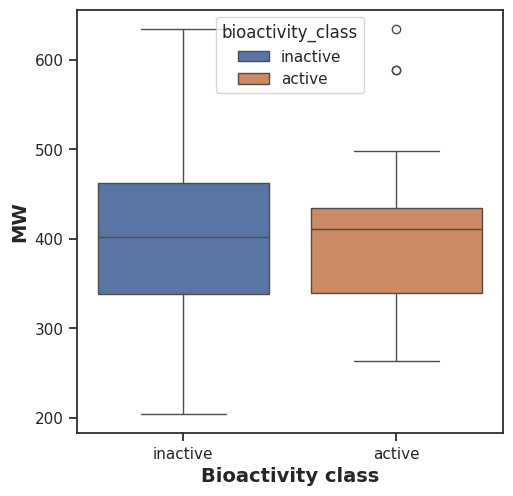

In [113]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [114]:
mannwhitney('MW')

Statistics=2720.500, p=0.826


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2720.5,0.825591,0.05,Same distribution (fail to reject H0)


#### LogP

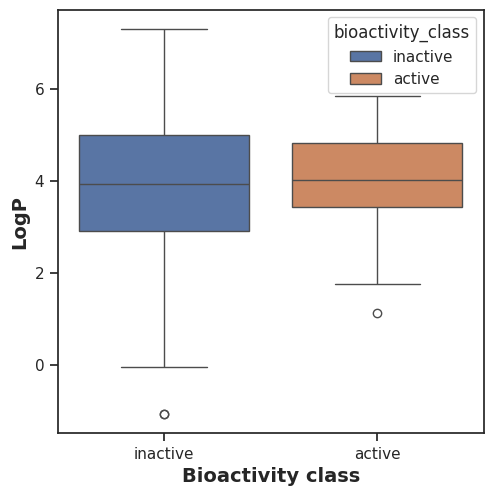

In [115]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [116]:
mannwhitney('LogP')

Statistics=2853.500, p=0.831


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2853.5,0.830714,0.05,Same distribution (fail to reject H0)


#### NumHDonors

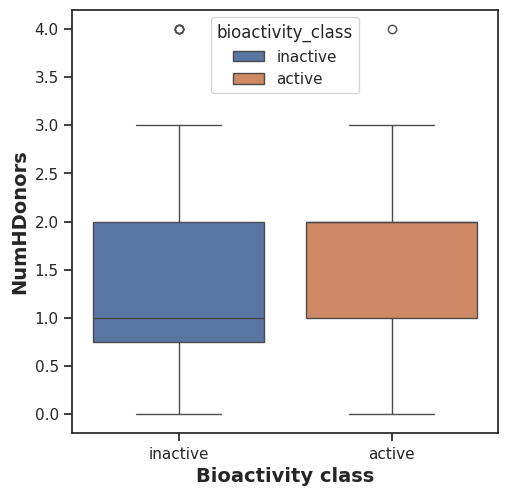

In [117]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [118]:
mannwhitney('NumHDonors')

Statistics=3185.500, p=0.170


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3185.5,0.169558,0.05,Same distribution (fail to reject H0)


#### NumHAcceptors

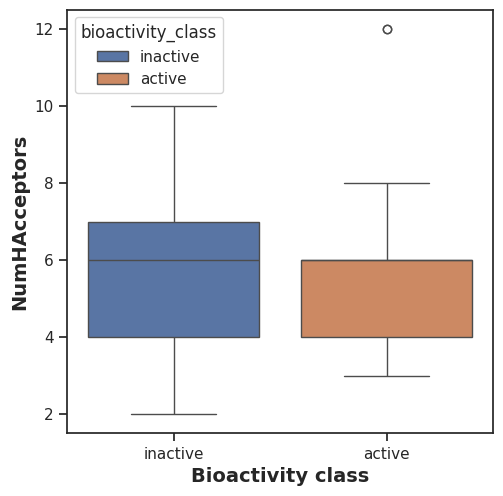

In [119]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [120]:
mannwhitney('NumHAcceptors')

Statistics=2584.000, p=0.497


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2584.0,0.497145,0.05,Same distribution (fail to reject H0)


#### Interpretation of Statistical Results

##### **Box Plots**

###### **pIC50**

taking a look at pIC50 value, the **actives** and **inactives** displayed ***statistically significant difference**, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactive``, corresponding to ``pIC50 > 6 = Active and pIC50 <5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's  descriptors**

All of the 4 Lipinski's descriptors exhibited ***statisticaaly significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [121]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: plot_MW_vs_LogP.pdf (deflated 12%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: plot_NumHAcceptors.pdf (deflated 36%)
updating: plot_pic50.pdf (deflated 37%)
updating: bioactivity_data_preprocessed.csv (deflated 82%)
updating: mannwhitneyu_pIC50.csv (deflated 9%)
updating: plot_MW.pdf (deflated 37%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
updating: plot_NumHDonors.pdf (deflated 36%)
updating: mannwhitneyu_NumHDonors.csv (deflated 9%)
updating: plot_LogP.pdf (deflated 37%)
updating: plot_bioactivity_class.pdf (deflated 36%)
updating: bioactivity_data_2class_pIC50.csv (deflated 82%)
